# Time Series components

### Trend

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend


### Seasonal
A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency.

### Cyclic
A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.

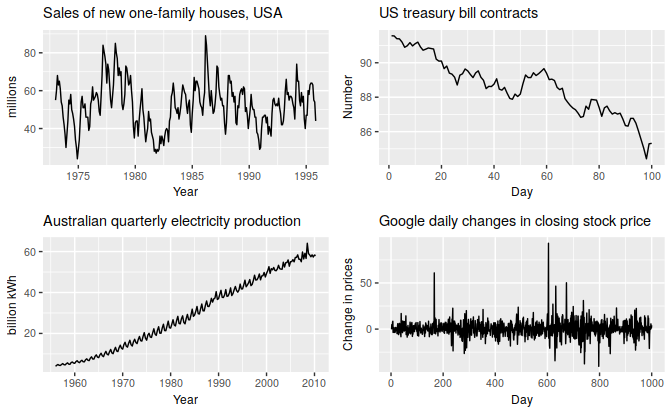

# Problem Statement
Unicorn Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric:

Root Mean Squre Error (RMSE) is the evaluation metric for this contest


* Link : https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

# 1) Hypothesis Generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:
1. There will be an increase in the traffic as the years pass by.

    * Explanation : Population has a general upward trend with time, so I can expect more people to travel by JetRail.
2. The traffic will be high from May to October.
    * Tourist visits generally increases during this time perion.

3. Traffic on weekdays will be more as compared to weekends/holidays.
    * Explanation - People will go to office on weekdays and hence the traffic will be more

4. Traffic during the peak hours will be high.
    * Explanation - People will travel to work, college.

In [199]:
# Import Packages
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [200]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [201]:
print(train.head())
print('shape of train data',train.shape)
print('shape of test data',test.shape)
print(train.isnull().sum())
print(train.dtypes)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
shape of train data (18288, 3)
shape of test data (5112, 2)
ID          0
Datetime    0
Count       0
dtype: int64
ID           int64
Datetime    object
Count        int64
dtype: object


# Feature Extraction

In [202]:
train['Datetime'] = pd.to_datetime(train['Datetime'])
test['Datetime'] = pd.to_datetime(test['Datetime'])


In [203]:
# Train Features
train['Year'] = train['Datetime'].dt.year
train['Month'] = train['Datetime'].dt.month
train['Day'] = train['Datetime'].dt.day
train['Hour'] = train['Datetime'].dt.hour

# Test Features
test['Year'] = test['Datetime'].dt.year
test['Month'] = test['Datetime'].dt.month
test['Day'] = test['Datetime'].dt.day
test['Hour'] = test['Datetime'].dt.hour

In [204]:
train['day of week']=train['Datetime'].dt.dayofweek 
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
train['weekend'] = train['Datetime'].apply(applyer) 


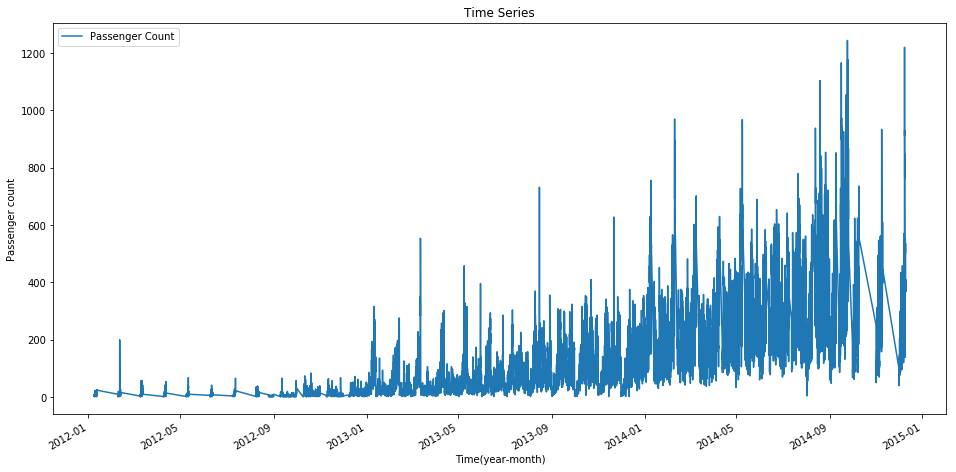

In [205]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
df['Count'].plot(label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

### Lets recollect the Hypothesis
* Traffic will increase as the years pass by
* Traffic will be high from May to October
* Traffic on weekdays will be more
* Traffic during the peak hours will be high

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

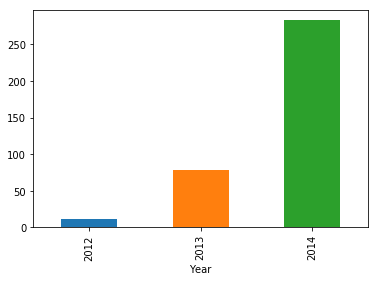

In [206]:
train.groupby('Year')['Count'].mean().plot.bar()


Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

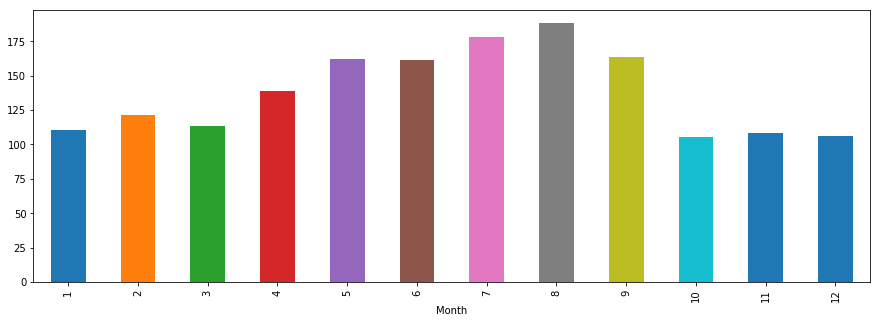

In [207]:
train.groupby('Month')['Count'].mean().plot.bar(figsize=(15,5))

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

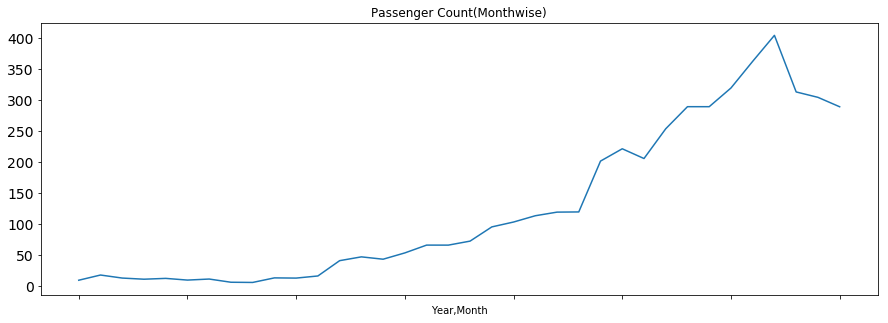

In [208]:
temp=train.groupby(['Year', 'Month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)
#plt.xlabels(temp, rotation=55, ha="center")

* We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
* Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

* In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

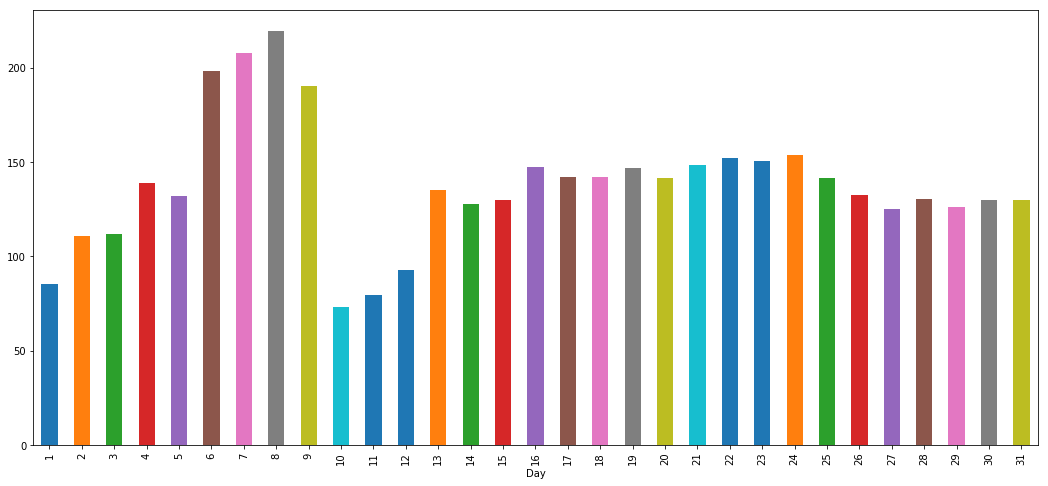

In [209]:
train.groupby('Day')['Count'].mean().plot.bar(figsize=(18,8))

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

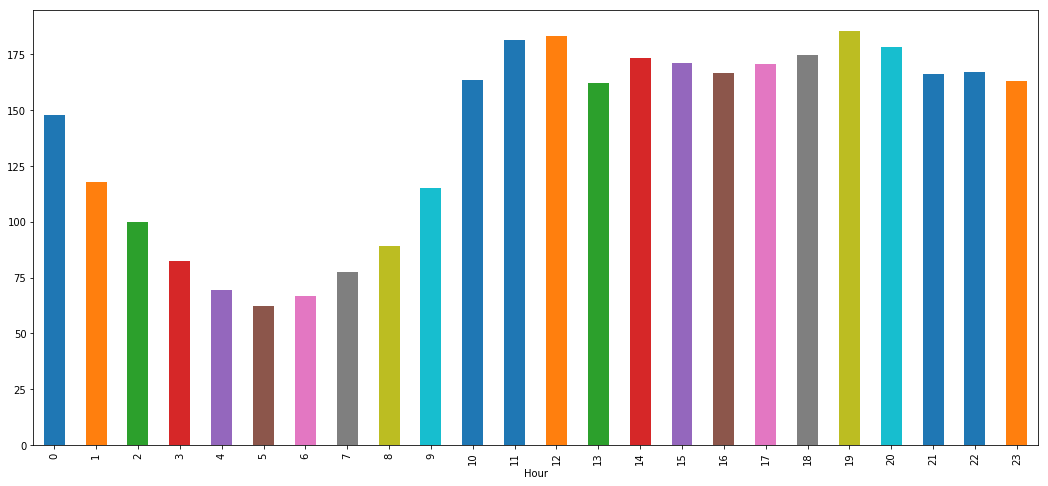

In [210]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(18,8))


* It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
* After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

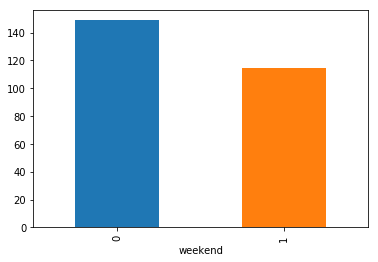

In [211]:
train.groupby('weekend')['Count'].mean().plot.bar()


It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

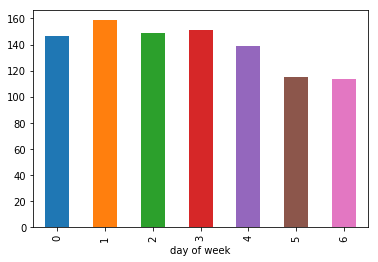

In [212]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [213]:
train=train.drop('ID',1)

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [214]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


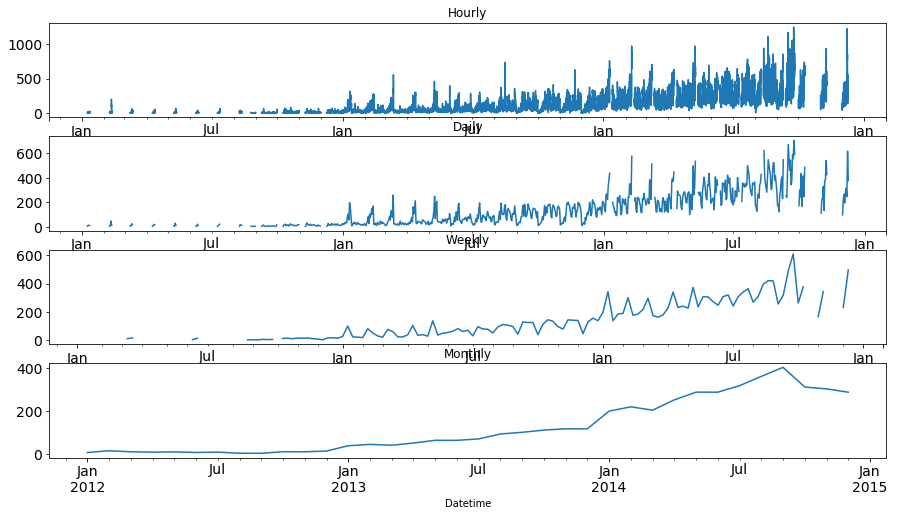

In [215]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [216]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. 

In [217]:
# Splitting data set into train and test
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']
#valid = valid[~valid.isna()]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


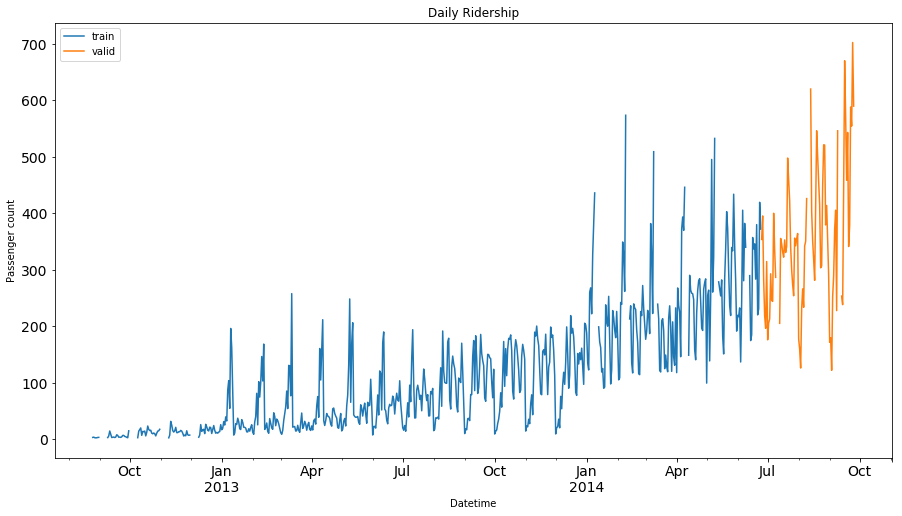

In [218]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

# Model Techniques

1. Naive Approach
2. Moving Average
3. Simple Exponential Smoothing
4. Holt’s Linear Trend Model

### Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. Lets understand it with an example and an image:

Suppose we have passenger count for 5 days as shown below:

| Day | Passenger Count|
|------|------|
|   1  | 10  |
| 2  | 12|
|3 | 12|
|4|14|
|5|15|

And we have to predict the passenger count for next 2 days. Naive approach will assign the 5th day’s passenger count to the 6th and 7th day, i.e., 15 will be assigned to the 6th and 7th day.

| Day | Passenger Count|
|------|------|
|   1  | 10  |
| 2  | 12|
|3 | 12|
|4|14|
|5|15|
|6|15|
|7|15|

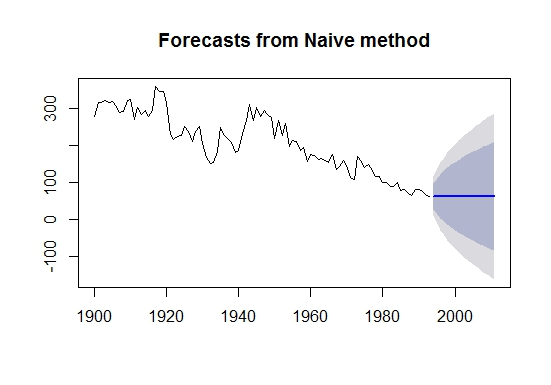

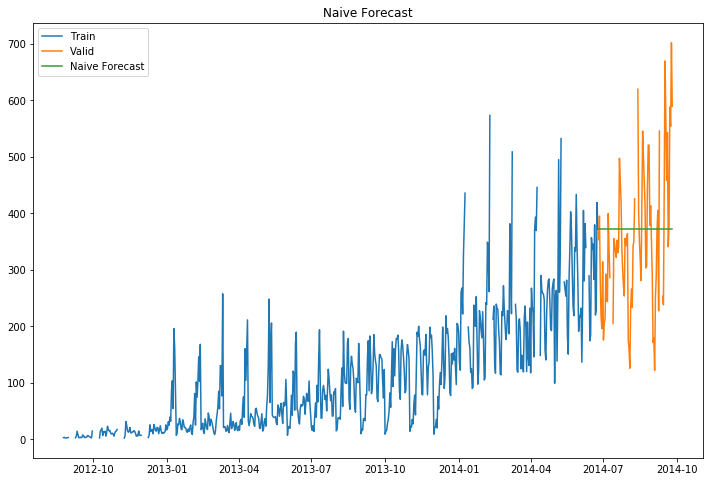

In [221]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

* We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
* rmse is the standard deviation of the residuals.
* Residuals are a measure of how far from the regression line data points are.
* The formula for rmse is:
   
rmse=sqrt∑i=1N1N(p−a)2

We will now calculate RMSE to check the accuracy of our model on validation data set.

In [222]:

x =pd.concat([valid.Count, y_hat.naive], ignore_index=True,axis=1).reset_index()

In [223]:
x.dropna(axis=0, how='any',inplace=True)
x.rename(columns={0: "Count", 1: "Naive"},inplace=True)

In [224]:

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(x.Count, x.Naive)) 
print(rms) 

126.78478691254846


# Moving Average

* In this technique we will take the average of the passenger counts for last few time periods only.


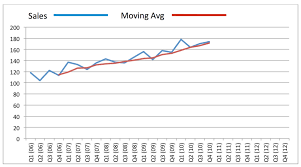

Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

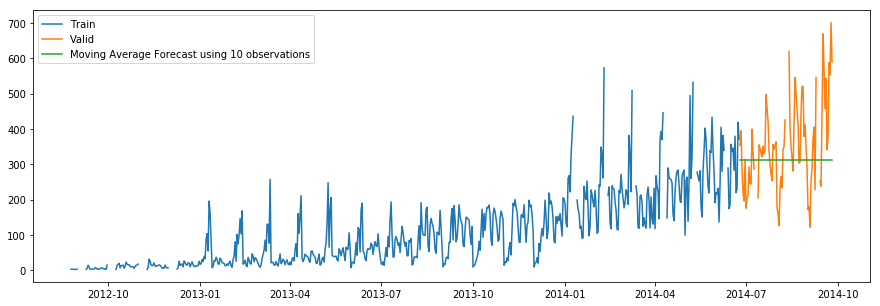

In [225]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').